<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Economic_Indicators_MT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

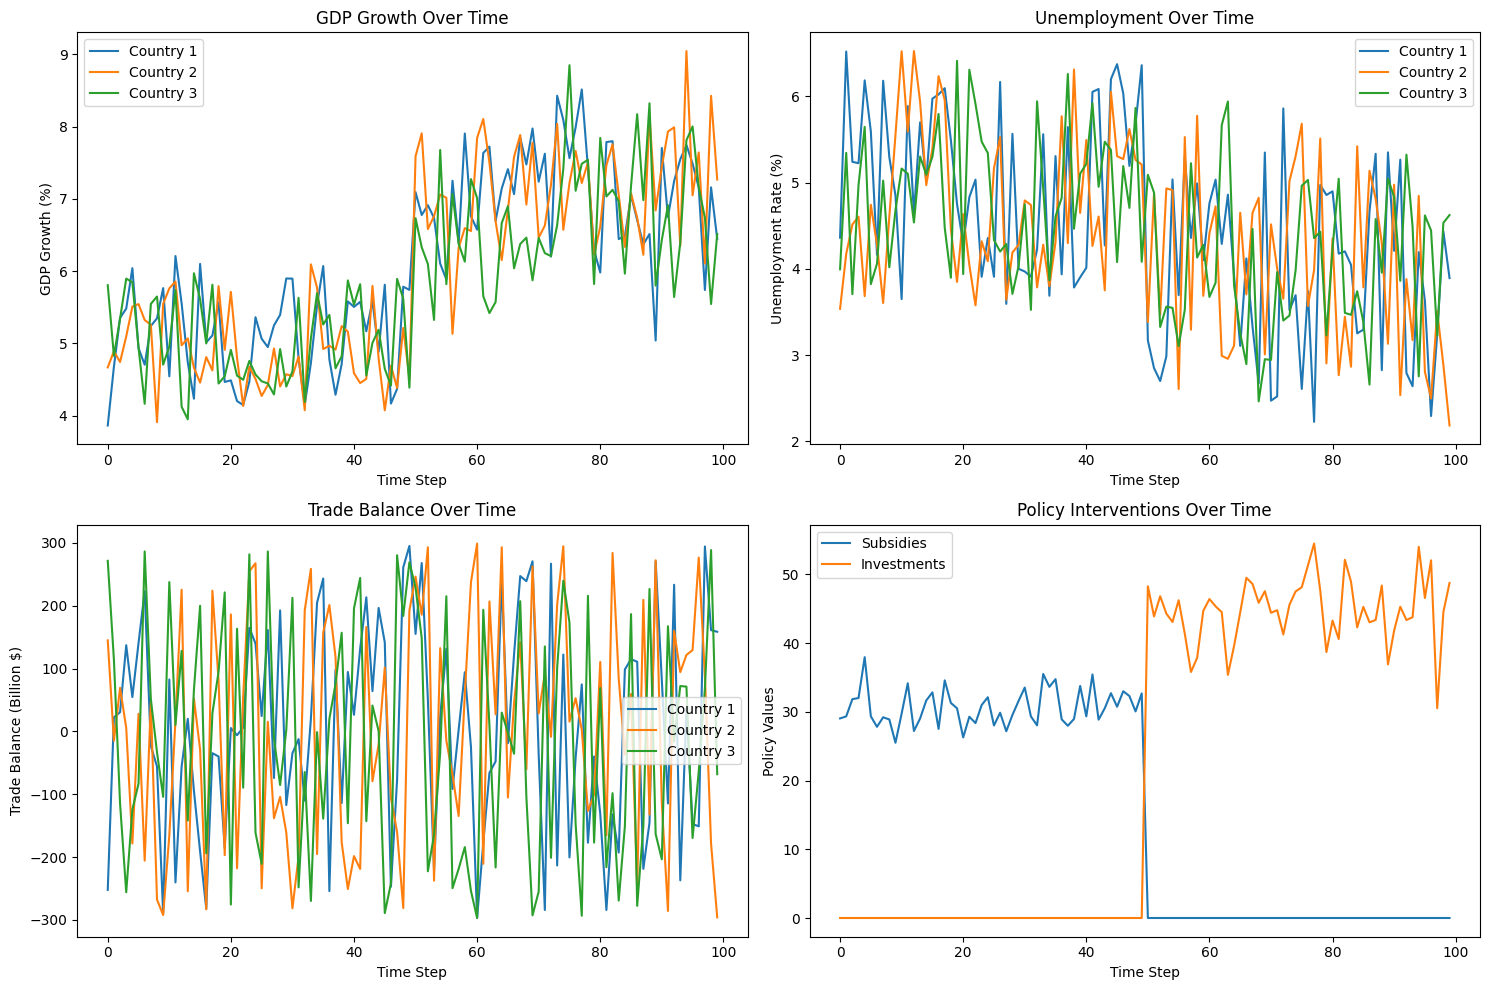

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
time_steps = 100
sectors = 5
countries = 3  # Example: USA, China, EU
GDP = np.random.uniform(3, 5, (time_steps, countries))  # Baseline GDP growth
TradeBalance = np.random.uniform(-300, 300, (time_steps, countries))  # Trade balance
Unemployment = np.random.uniform(4, 7, (time_steps, countries))  # Unemployment rate

# Policy tensors
Subsidies = np.zeros((time_steps, sectors, countries))  # Short-term subsidies
Investments = np.zeros((time_steps, sectors, countries))  # Long-term investments

# Apply policies
for t in range(time_steps):
    for sector in range(sectors):
        for country in range(countries):
            if t < 50:  # Short-term policy
                Subsidies[t, sector, country] = np.random.uniform(1, 3)  # Subsidy values
            if t >= 50:  # Long-term policy
                Investments[t, sector, country] = np.random.uniform(1, 5)  # Investment values

            # Economic effects of policies
            GDP[t, country] += Subsidies[t, sector, country] * 0.1  # Subsidy boosts GDP
            GDP[t, country] += Investments[t, sector, country] * 0.2  # Investment boosts GDP

            Unemployment[t, country] -= Subsidies[t, sector, country] * 0.05  # Subsidy reduces unemployment
            Unemployment[t, country] -= Investments[t, sector, country] * 0.1  # Investment reduces unemployment

            TradeBalance[t, country] += Investments[t, sector, country] * 0.15  # Investments improve trade balance

# Plot the results
plt.figure(figsize=(15, 10))

# GDP Growth
plt.subplot(2, 2, 1)
for country in range(countries):
    plt.plot(range(time_steps), GDP[:, country], label=f"Country {country + 1}")
plt.title("GDP Growth Over Time")
plt.xlabel("Time Step")
plt.ylabel("GDP Growth (%)")
plt.legend()

# Unemployment
plt.subplot(2, 2, 2)
for country in range(countries):
    plt.plot(range(time_steps), Unemployment[:, country], label=f"Country {country + 1}")
plt.title("Unemployment Over Time")
plt.xlabel("Time Step")
plt.ylabel("Unemployment Rate (%)")
plt.legend()

# Trade Balance
plt.subplot(2, 2, 3)
for country in range(countries):
    plt.plot(range(time_steps), TradeBalance[:, country], label=f"Country {country + 1}")
plt.title("Trade Balance Over Time")
plt.xlabel("Time Step")
plt.ylabel("Trade Balance (Billion $)")
plt.legend()

# Subsidies and Investments
plt.subplot(2, 2, 4)
plt.plot(range(time_steps), np.sum(Subsidies, axis=(1, 2)), label="Subsidies")
plt.plot(range(time_steps), np.sum(Investments, axis=(1, 2)), label="Investments")
plt.title("Policy Interventions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Policy Values")
plt.legend()

plt.tight_layout()
plt.show()
